# Mathematics For AI Assignment 2

* Name: Lim Jun Jie
* Admin Number: 2100788
* Class: DAAA/FT/2A/02

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

## About the Dataset
The dataset housing_price.csv consists of `price per square metre ($ in thousands)` of 30 flats in the same district of Singapore. Two predictory variables are also provided which are `inverse distance to the nearest MRT station (km-1)` and `inverse age of flat (year-1)`

In [2]:
df = pd.read_csv('housing_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   inverse age of flat (year-1)                        30 non-null     float64
 1   inverse distance to the nearest MRT station (km-1)  30 non-null     float64
 2   price per square metre ($ in thousands)             30 non-null     float64
dtypes: float64(3)
memory usage: 848.0 bytes


In [4]:
df.head()

,inverse age of flat (year-1),inverse distance to the nearest MRT station (km-1),price per square metre ($ in thousands)
0,0.160,7.404,8.913
1,0.114,1.789,6.308
2,0.049,1.379,5.963
3,0.046,1.373,5.511
4,0.183,15.948,9.774


# MODEL 1
Build a Simple Linear Regression Model to predict `price per square metre ($ in thousands)` using `inverse distance to the nearest MRT station (km-1)` as the predictor, with intercept a=0, using gradient descent to determine the best slope.

In [29]:
b = 10 # Starting value of b
alpha = 0.005 # Learning rate
epsilon = 0.001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(b): # calculate error function E(b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += (y - b*x)**2
    return 1/len(df) * summation

def E_prime(b): # 1st derivative of E(b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += x * (y - b*x)
    return -2/len(df) * summation

model1_gradientdesc = pd.DataFrame(columns=['b', 'E(b)'])

for iter in range(max_iters): # gradient descent
    new_b = b - alpha * E_prime(b) # update of b
    print(f"Iteration {iter + 1}: b-value = {new_b}, E(b) = {E(new_b)}")
    diff = abs(E(new_b) - E(b)) # stopping criterion
    model1_gradientdesc = model1_gradientdesc.append({'b': new_b, 'E(b)': E(new_b)}, ignore_index=True)
    if diff < epsilon: # break if converge
        print(f"The local minimum occurs at b = {new_b}")
        break
    b = new_b

Iteration 1: b-value = 5.134997594333333, E(b) = 1008.6076753150354
Iteration 2: b-value = 2.8463084394411142, E(b) = 238.37706343050388
Iteration 3: b-value = 1.7696187256559741, E(b) = 67.91478861383439
Iteration 4: b-value = 1.2631013869895447, E(b) = 30.1892208587711
Iteration 5: b-value = 1.0248156384726599, E(b) = 21.84005114381495
Iteration 6: b-value = 0.9127166171523949, E(b) = 19.992268881617317
Iteration 7: b-value = 0.8599808129376044, E(b) = 19.583330100270466
Iteration 8: b-value = 0.8351718091351961, E(b) = 19.492826511016098
Iteration 9: b-value = 0.8235006745268934, E(b) = 19.472796863446483
Iteration 10: b-value = 0.8180101121435744, E(b) = 19.468364036140198
Iteration 11: b-value = 0.8154271348841338, E(b) = 19.467382992521785
The local minimum occurs at b = 0.8154271348841338


## Gradient Descent Visualization
The graph below shows the algorithm's progress of minimizing the error function over the course of the iterations for Model 1, using the parameters of the dummy model above with starting b-value of 10 and learning rate of 0.005

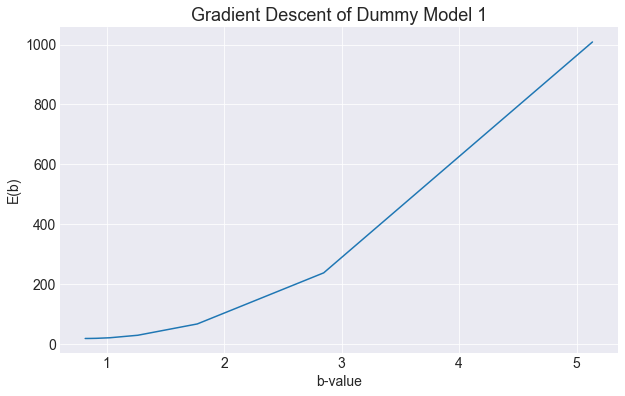

In [42]:
# plot gradient descent results
plt.figure(figsize=(10,6))
plt.plot(model1_gradientdesc['b'], model1_gradientdesc['E(b)'], linestyle='-')

plt.xlabel('b-value', fontsize=14)
plt.ylabel('E(b)', fontsize=14)
plt.title('Gradient Descent of Dummy Model 1', fontsize=18)

# resize tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## Model 1 Tuning
To find the best possible Error score by trying out different starting b-values.

In [6]:
def model1_gridSearch(b, alpha, epsilon, max_iters): # model 1 with grid search, only keeps results if converge
    b_val_array = b # Starting value of b
    alpha_array = alpha # Learning rate
    epsilon = epsilon # Stopping criterion
    max_iters = max_iters # Maximum number of iterations
    results = pd.DataFrame(columns=['alpha', 'Starting b-value', 'Iterations', 'b', 'E(b)']) # create empty dataframe to store results

    def E(b): # calculate error function E(b)
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            summation += (y - b*x)**2
        return 1/len(df) * summation

    def E_prime(b): # 1st derivative of E(b)
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            summation += x * (y - b*x)
        return -2/len(df) * summation

    for alpha in alpha_array: # loop through all learning rates
        for starting_b in b_val_array: # loop through b values
            b = starting_b
            for iter in range(max_iters): # gradient descent
                new_b = b - alpha * E_prime(b) # update of b
                diff = abs(E(new_b) - E(b)) # stopping criterion
                if diff < epsilon: # break if converge
                    results.loc[len(results)] = [alpha, starting_b, iter + 1, new_b, E(new_b)] # push results to dataframe
                    break
                b = new_b

    return results

### 1st round of tuning
I first tried multiple starting b-values that vary from -5000 to 5000 to see if the model would converge to different Mean Squared Error (MSE) values. The top 4  lowest MSE scores showed a MSE of 19.467104 while the 5th shows a MSE of 19.467106. The 3rd and 4th scores may suggest that a starting b of -5 to 5 can give us the same MSE score with the lowest number of iterations of 4.

In [9]:
results_df = model1_gridSearch([-5000, -500, -5, 0, 5, 500, 5000], [0.01], 0.001, 1000)
results_df.sort_values(by=['E(b)'], inplace=True) # sort results by error function
results_df.head()

,alpha,Starting b-value,Iterations,b,E(b)
5,0.01,500.0,6.0,0.813154,19.467104
1,0.01,-500.0,6.0,0.813111,19.467104
4,0.01,5.0,4.0,0.813184,19.467104
2,0.01,-5.0,4.0,0.813062,19.467104
3,0.01,0.0,3.0,0.813301,19.467106


### 2nd round of tuning
To check if we can find a better starting b-value that gives us a better MSE score or lower number of iterations, I tested starting b-values of 0 to 5, with increments of 0.1. I also tried different values of alpha, which are 0.02, 0.01 and 0.005. The top 5 lowest MSE scores are all E(b)=19.467104 with alpha=0.01. However a starting b-value of 0.9 gave the smallest number of iterations of 3, thus it would be used as the final model.

In [8]:
results_df = model1_gridSearch(np.arange(0, 5, 0.1), [0.02, 0.01, 0.005], 0.001, 1000)
results_df.sort_values(by=['E(b)'], inplace=True) # sort results by error function
results_df.head()

,alpha,Starting b-value,Iterations,b,E(b)
21,0.01,2.1,4.0,0.813148,19.467104
22,0.01,2.2,4.0,0.813149,19.467104
9,0.01,0.9,3.0,0.813115,19.467104
23,0.01,2.3,4.0,0.813151,19.467104
24,0.01,2.4,4.0,0.813152,19.467104


## Final Model 1
With alpha=0.01 and b=0.9, the final Model 1 has a Mean Squared Error of 19.467 with 3 iterations using Gradient Descent.

In [41]:
b = 0.9 # Starting value of b
alpha = 0.01 # Learning rate
epsilon = 0.001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(b): # calculate error function E(b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += (y - b*x)**2
    return 1/len(df) * summation

def E_prime(b): # 1st derivative of E(b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += x * (y - b*x)
    return -2/len(df) * summation

for iter in range(max_iters): # gradient descent
    new_b = b - alpha * E_prime(b) # update of b
    print(f"Iteration {iter + 1}: b-value = {new_b}, E(b) = {E(new_b)}")
    diff = abs(E(new_b) - E(b)) # stopping criterion
    if diff < epsilon: # break if converge
        print(f"The local minimum occurs at b = {new_b}")
        break
    b = new_b

Iteration 1: b-value = 0.8079968286, E(b) = 19.468500902924767
Iteration 2: b-value = 0.8134361535551942, E(b) = 19.46710904866608
Iteration 3: b-value = 0.8131145749017848, E(b) = 19.46710418371837
The local minimum occurs at b = 0.8131145749017848


# MODEL 2
Build a Simple Linear Regression Model to predict `price per square metre ($ in thousands)` using `inverse distance to the nearest MRT station (km-1)` as the predictor, this time with the intercept term `a` included, using gradient descent to determine the best slope and intercept.

In [39]:
a = 1 # Starting value of a
b = 1 # Starting value of b
alpha = 0.01 # Learning rate
epsilon = 0.001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(a, b): # calculate error function E(a, b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += (y - a - b*x)**2
    return 1/len(df) * summation 

def partial_E_a(a, b): # 1st derivative of E(a, b) with respect to a
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += y - a - b*x
    return -2/len(df) * summation

def partial_E_b(a, b): # 1st derivative of E(a, b) with respect to b
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += x * (y - a - b*x)
    return -2/len(df) * summation

model2_gradientdesc = pd.DataFrame(columns=['a-value', 'b-value', 'E(a,b)']) # create empty dataframe to store results

for iter in range(max_iters): # Gradient Descent
    new_a = a - alpha * partial_E_a(a, b) # update of a
    new_b = b - alpha * partial_E_b(a, b) # update of b
    diff = abs(E(new_a, new_b) - E(a, b)) # stopping criterion
    # print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, E(a,b) = {E(new_a, new_b)}")
    model2_gradientdesc.loc[len(model2_gradientdesc)] = [new_a, new_b, E(new_a, new_b)] # store results
    if diff < epsilon:
        print(f"Iteration {iter + 1}: a = {new_a}, b = {new_b}, E(a,b) = {E(new_a, new_b)}")
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}")
        break
    a = new_a
    b = new_b

Iteration 249: a = 5.472914618937888, b = 0.3234424194619275, E(a,b) = 0.5050797676016512
The local minimum occurs at a = 5.472914618937888, b = 0.3234424194619275


## Gradient Descent Visualization
The graph below shows the algorithm's progress of minimizing the error function over the course of the iterations for Model 2, using the parameters of the dummy model above with starting a and b-values of 1, learning rate of 0.01 and epsilon of 0.001.

In [44]:
# plot 3d gradient descent using plotly express
fig = px.scatter_3d(model2_gradientdesc, x='a-value', y='b-value', z='E(a,b)')

# set title
fig.update_layout(title='3D Gradient Descent of Model 2')

fig.show()

## Model 2 Tuning

In [70]:
def model2_gridSearch(a, b, alpha, epsilon, max_iters): # model 2 with grid search, only keeps results if converge
    a_val_array = a # Starting value of a
    b_val_array = b # Starting value of b
    alpha_array = alpha # Learning rate
    epsilon_array = epsilon # Stopping criterion
    max_iters = max_iters # Maximum number of iterations

    def E(a, b): # calculate error function E(a, b)
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            summation += (y - a - b*x)**2
        return 1/len(df) * summation 

    def partial_E_a(a, b): # 1st derivative of E(a, b) with respect to a
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            summation += y - a - b*x
        return -2/len(df) * summation

    def partial_E_b(a, b): # 1st derivative of E(a, b) with respect to b
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            summation += x * (y - a - b*x)
        return -2/len(df) * summation

    results = pd.DataFrame(columns=['alpha', 'epsilon', 'iterations', 'starting a', 'starting b', 'E(a,b)']) # dataframe to store results

    for epsilon in epsilon_array: # loop through all stopping criteria
        for alpha in alpha_array: # loop through all learning rates
            for starting_a in a_val_array: # loop through all a values
                for starting_b in b_val_array: # loop through b values
                    a = starting_a
                    b = starting_b
                    for iter in range(max_iters): # Gradient Descent
                        new_a = a - alpha * partial_E_a(a, b) # update of a
                        new_b = b - alpha * partial_E_b(a, b) # update of b
                        diff = abs(E(new_a, new_b) - E(a, b)) # stopping criterion
                        if diff < epsilon:
                            # store results if converge
                            results.loc[len(results)] = [alpha, epsilon, iter + 1, starting_a, starting_b, E(new_a, new_b)]
                            break
                        a = new_a
                        b = new_b

    return results

### 1st round of tuning
The top 5 lowest Error scores all have alpha of 0.01, epsilon of 0.0001 and MSE of 0.466 (3s.f). The lowest number of iterations is 340 in the top 5 scores, with a starting value of a=10 and starting value of b=0.

In [71]:
a_vals = [-5000, -1000, -500, -10, 0, 10, 500, 1000, 5000] # a values to test
b_vals = [-5000, -1000, -500, -10, 0, 10, 500, 1000, 5000] # b values to test
alpha_vals = [0.02, 0.01, 0.005] # learning rates to test
epsilon_vals = [0.001, 0.0001] # stopping criteria to test
results_df = model2_gridSearch(a_vals, b_vals, alpha_vals, epsilon_vals, 1000) # run model 2 with grid search
results_df = results_df.sort_values(by=['E(a,b)']) # sort results by error function
results_df.head() # print top 5 results

,alpha,epsilon,iterations,starting a,starting b,"E(a,b)"
128,0.01,0.0001,763.0,-500.0,500.0,0.466296
157,0.01,0.0001,745.0,10.0,5000.0,0.466299
141,0.01,0.0001,600.0,0.0,-1000.0,0.466300
153,0.01,0.0001,340.0,10.0,0.0,0.466301
147,0.01,0.0001,611.0,0.0,1000.0,0.466302


### 2nd round of tuning
To try to minimize the number of iterations even further and also reduce the Mean-Squared Error, I will be using alpha of 0.01 and epsilon of 0.0001 to find the best starting value of a and b to get the lowest MSE and iterations.

In [76]:
a_vals = np.arange(5, 6, 0.1) # a values to test
b_vals = np.arange(0, 1, 0.1) # b values to test
results_df = model2_gridSearch(a_vals, b_vals, [0.01], [0.0001], 1000) # run model 2 with grid search
results_df = results_df.sort_values(by=['E(a,b)']) # sort results by error function
results_df.head() # print top 5 results

,alpha,epsilon,iterations,starting a,starting b,"E(a,b)"
89,0.01,0.0001,4.0,5.8,0.9,0.462090
88,0.01,0.0001,4.0,5.8,0.8,0.462127
87,0.01,0.0001,4.0,5.8,0.7,0.462248
70,0.01,0.0001,4.0,5.7,0.0,0.462279
86,0.01,0.0001,4.0,5.8,0.6,0.462454


## Final Model 2
With alpha=0.01, epsilon=0.0001, starting value of a=5.8 and starting value of b=0.9, the final Model 2 has a Mean-Squared Error of 0.462090 and the number of iterations is 4.

In [43]:
a = 5.8 # Starting value of a
b = 0.9 # Starting value of b
alpha = 0.01 # Learning rate
epsilon = 0.0001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(a, b): # calculate error function E(a, b)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += (y - a - b*x)**2
    return 1/len(df) * summation 

def partial_E_a(a, b): # 1st derivative of E(a, b) with respect to a
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += y - a - b*x
    return -2/len(df) * summation

def partial_E_b(a, b): # 1st derivative of E(a, b) with respect to b
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        summation += x * (y - a - b*x)
    return -2/len(df) * summation

for iter in range(max_iters): # Gradient Descent
    new_a = a - alpha * partial_E_a(a, b) # update of a
    new_b = b - alpha * partial_E_b(a, b) # update of b
    diff = abs(E(new_a, new_b) - E(a, b)) # stopping criterion
    print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, E(a,b) = {E(new_a, new_b)}")
    if diff < epsilon:
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}")
        break
    a = new_a
    b = new_b

Iteration 1: a = 5.741911666666667, b = 0.25806016193333337, E(a,b) = 0.551266865382882
Iteration 2: a = 5.745851695646021, b = 0.301520067326992, E(a,b) = 0.46249869906417596
Iteration 3: a = 5.7455922006827125, b = 0.2985770912672, E(a,b) = 0.4620918209580253
Iteration 4: a = 5.74561693879874, b = 0.2987756875768853, E(a,b) = 0.46208995151850657
The local minimum occurs at a = 5.74561693879874, b = 0.2987756875768853


## Gradient Descent Visualization
The graph below shows the algorithm's progress of minimizing the error function over the course of the iterations for Model 2, using the parameters of the tuned model.

In [97]:
# plot 3d gradient descent using plotly express
fig = px.scatter_3d(model2_gradientdesc, x='a-value', y='b-value', z='E(a,b)')
fig.show()

# SLR Visualization
Visualize Simple Linear Regression Models 1 and 2 using the scatter plot of the actual values and the line of best fit for each model.

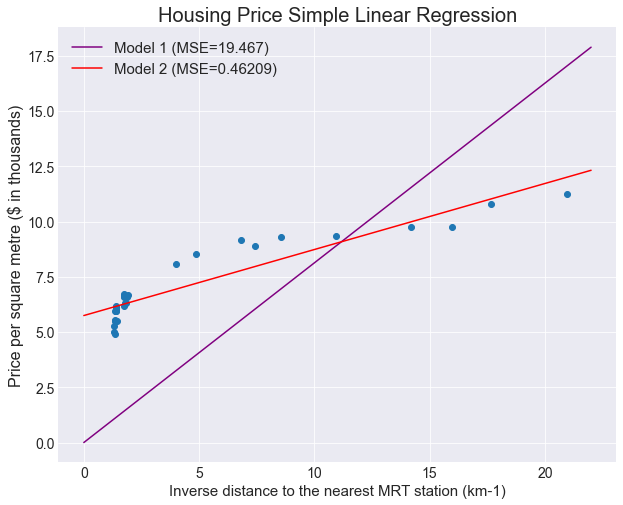

In [47]:
fig = plt.figure(figsize=(10,8))
x = np.linspace(0,22)
y1 = 0.81311*x # Model 1 Equation
y2 = 5.7456 + 0.29878*x # Model 2 Equation

ax = plt.scatter(x=df['inverse distance to the nearest MRT station (km-1)'], y=df['price per square metre ($ in thousands)'])
ax = plt.plot(x, y1, color='purple', label='Model 1 (MSE=19.467)')
ax = plt.plot(x, y2, 'red', label='Model 2 (MSE=0.46209)')

plt.legend(fontsize=15) # show legend
plt.title('Housing Price Simple Linear Regression', fontsize=20) # title of plot
plt.xlabel('Inverse distance to the nearest MRT station (km-1)', fontsize=15) # x-axis label
plt.ylabel('Price per square metre ($ in thousands)', fontsize=16) # y-axis label
plt.tick_params(axis='both', which='major', labelsize=14) # tick labels size
plt.show()

# MODEL 3
Build a Multiple Linear Regression Model to predict `price per square metre ($ in thousands)` using `inverse distance to the nearest MRT station (km-1)` and `inverse age of flat (year-1)` as the predictors, with the intercept term `a` included, using the Gradient Descent algorithm to determine the values of the slopes and the intercept.

In [49]:
a = 1 # Starting value of a
b = 1 # Starting value of b
c = 1 # Starting value of c
alpha = 0.01 # Learning rate
epsilon = 0.001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(a, b, c): # calculate error function E(a, b, c)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += (y - a - b*x - c*w)**2
    return 1/len(df) * summation

def partialE_a(a, b, c): # 1st derivative of E(a, b, c) with respect to a
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += y - a - b*x - c*w
    return -2/len(df) * summation

def partialE_b(a, b, c): # 1st derivative of E(a, b, c) with respect to b
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += x * (y - a - b*x - c*w)
    return -2/len(df) * summation

def partialE_c(a, b, c): # 1st derivative of E(a, b, c) with respect to c
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += w * (y - a - b*x - c*w)
    return -2/len(df) * summation

for iter in range(max_iters): # Gradient Descent
    new_a = a - alpha * partialE_a(a, b, c) # update of a
    new_b = b - alpha * partialE_b(a, b, c) # update of b
    new_c = c - alpha * partialE_c(a, b, c) # update of c
    diff = abs(E(new_a, new_b, new_c) - E(a, b, c)) # stopping criterion
    # print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, c= {new_c}, E(a,b,c) = {E(new_a, new_b, new_c)}")
    if diff < epsilon:
        print(f"Iteration {iter + 1}: a = {new_a}, b = {new_b}, c= {new_c}, E(a,b,c) = {E(new_a, new_b, new_c)}")
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}, c={new_c}")
        break
    a = new_a
    b = new_b
    c = new_c

Iteration 247: a = 5.364503371524537, b = 0.31286031463014785, c= 1.4252336827576164, E(a,b,c) = 0.45427601124724726
The local minimum occurs at a = 5.364503371524537, b = 0.31286031463014785, c=1.4252336827576164


## Model 3 Tuning

In [86]:
def model3_tuning(a, b, c, alpha, epsilon, max_iters): # model 3 with tuning
    a_vals = a # Starting value of a
    b_vals = b # Starting value of b
    c_vals = c # Starting value of c
    alpha_vals = alpha # Learning rate
    epsilon_vals = epsilon # Stopping criterion
    max_iters = max_iters # Maximum number of iterations

    def E(a, b, c): # calculate error function E(a, b, c)
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            w = df.loc[rownum, 'inverse age of flat (year-1)']
            summation += (y - a - b*x - c*w)**2
        return 1/len(df) * summation

    def partialE_a(a, b, c): # 1st derivative of E(a, b, c) with respect to a
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            w = df.loc[rownum, 'inverse age of flat (year-1)']
            summation += y - a - b*x - c*w
        return -2/len(df) * summation

    def partialE_b(a, b, c): # 1st derivative of E(a, b, c) with respect to b
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            w = df.loc[rownum, 'inverse age of flat (year-1)']
            summation += x * (y - a - b*x - c*w)
        return -2/len(df) * summation

    def partialE_c(a, b, c): # 1st derivative of E(a, b, c) with respect to c
        summation = 0
        for rownum in np.arange(len(df)):
            y = df.loc[rownum, 'price per square metre ($ in thousands)']
            x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
            w = df.loc[rownum, 'inverse age of flat (year-1)']
            summation += w * (y - a - b*x - c*w)
        return -2/len(df) * summation

    results = pd.DataFrame(columns=['alpha', 'epsilon', 'iterations', 'starting a', 'starting b', 'starting c', 'E(a,b,c)']) # dataframe to store results

    for epsilon in epsilon_vals:
        for alpha in alpha_vals: # for each learning rate
            for starting_a in a_vals:
                for starting_b in b_vals:
                    for starting_c in c_vals: # loop through c values
                        a = starting_a # starting value of a
                        b = starting_b # starting value of b
                        c = starting_c # starting value of c
                        for iter in range(max_iters): # Gradient Descent
                            new_a = a - alpha * partialE_a(a, b, c) # update of a
                            new_b = b - alpha * partialE_b(a, b, c) # update of b
                            new_c = c - alpha * partialE_c(a, b, c) # update of c
                            diff = abs(E(new_a, new_b, new_c) - E(a, b, c)) # stopping criterion
                            if diff < epsilon:
                                # store results in dataframe
                                results.loc[len(results)] = [alpha, epsilon, iter+1, starting_a, starting_b, starting_c, E(new_a, new_b, new_c)]
                                break
                            a = new_a
                            b = new_b
                            c = new_c

    return results

### 1st round of tuning
Four of the top 5 lowest Mean Squared Error scores all have alpha of 0.01 and all the top 5 lowest Mean Squared Error scors have a epsilon of 0.0001. However the number of iterations is high, with the lowest number of iterations being 441 in the top 5 scores.

In [87]:
a_vals = [-500, -10, 0, 10, 500] # a values to test
b_vals = [-500, -10, 0, 10, 500] # b values to test
c_vals = [-500, -10, 0, 10, 500] # c values to test
alpha_vals = [0.01, 0.005] # learning rates to test
epsilon_vals = [0.001, 0.0001] # stopping criteria to test
results_df = model3_tuning(a_vals, b_vals, c_vals, alpha_vals, epsilon_vals, 1000) # run model 2 with grid search
results_df = results_df.sort_values(by=['E(a,b,c)']) # sort results by error function
results_df.head() # print top 5 results

,alpha,epsilon,iterations,starting a,starting b,starting c,"E(a,b,c)"
137,0.010,0.0001,509.0,-10.0,-500.0,10.0,0.165746
186,0.005,0.0001,959.0,-10.0,-500.0,10.0,0.170130
152,0.010,0.0001,533.0,0.0,-500.0,10.0,0.170162
167,0.010,0.0001,552.0,10.0,-500.0,10.0,0.175843
140,0.010,0.0001,441.0,-10.0,-10.0,10.0,0.194464


### 2nd round of tuning
To try to minimize the number of iterations and also reduce the Mean-Squared Error, I will be using alpha of 0.01 and epsilon of 0.0001 to find the best starting value of a, b and c to get the lowest MSE and iterations.

In [88]:
a_vals = np.arange(4, 5, 0.1) # a values to test
b_vals = np.arange(1, 2, 0.1) # b values to test
c_vals = np.arange(10, 20, 1) # c values to test
results_df = model3_tuning(a_vals, b_vals, c_vals, [0.01], [0.0001], 1000) # run model 2 with grid search
results_df = results_df.sort_values(by=['E(a,b,c)']) # sort results by error function
results_df.head() # print top 5 results

,alpha,epsilon,iterations,starting a,starting b,starting c,"E(a,b,c)"
547,0.01,0.0001,4.0,4.5,1.4,17.0,0.156181
537,0.01,0.0001,4.0,4.5,1.3,17.0,0.156193
557,0.01,0.0001,4.0,4.5,1.5,17.0,0.156255
527,0.01,0.0001,4.0,4.5,1.2,17.0,0.156292
567,0.01,0.0001,4.0,4.5,1.6,17.0,0.156416


## Final Model 3
With alpha = 0.01, epsilon = 0.0001, starting value of a=4.5, b=1.4 and c=17, the final Model 3 has a Mean-Squared Error of 0.156181 and the number of iterations is 4.

In [90]:
a = 4.5 # Starting value of a
b = 1.4 # Starting value of b
c = 17 # Starting value of c
alpha = 0.01 # Learning rate
epsilon = 0.0001 # Stopping criterion
max_iters = 1000 # Maximum number of iterations

def E(a, b, c): # calculate error function E(a, b, c)
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += (y - a - b*x - c*w)**2
    return 1/len(df) * summation

def partialE_a(a, b, c): # 1st derivative of E(a, b, c) with respect to a
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += y - a - b*x - c*w
    return -2/len(df) * summation

def partialE_b(a, b, c): # 1st derivative of E(a, b, c) with respect to b
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += x * (y - a - b*x - c*w)
    return -2/len(df) * summation

def partialE_c(a, b, c): # 1st derivative of E(a, b, c) with respect to c
    summation = 0
    for rownum in np.arange(len(df)):
        y = df.loc[rownum, 'price per square metre ($ in thousands)']
        x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
        w = df.loc[rownum, 'inverse age of flat (year-1)']
        summation += w * (y - a - b*x - c*w)
    return -2/len(df) * summation

for iter in range(max_iters): # Gradient Descent
    new_a = a - alpha * partialE_a(a, b, c) # update of a
    new_b = b - alpha * partialE_b(a, b, c) # update of b
    new_c = c - alpha * partialE_c(a, b, c) # update of c
    diff = abs(E(new_a, new_b, new_c) - E(a, b, c)) # stopping criterion
    print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, c= {new_c}, E(a,b,c) = {E(new_a, new_b, new_c)}")
    if diff < epsilon:
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}, c={new_c}")
        break
    a = new_a
    b = new_b
    c = new_c

Iteration 1: a = 4.381958666666667, b = 0.09543465293333298, c= 16.981327630133332, E(a,b,c) = 0.5268402331451587
Iteration 2: a = 4.390015034144316, b = 0.1840357666794275, c= 16.982598954818357, E(a,b,c) = 0.15789084974400644
Iteration 3: a = 4.389506529487217, b = 0.1780145279850617, c= 16.98251568924294, E(a,b,c) = 0.1561887610630267
Iteration 4: a = 4.389579297496279, b = 0.1784199801932523, c= 16.982524390811378, E(a,b,c) = 0.15618078085446377
The local minimum occurs at a = 4.389579297496279, b = 0.1784199801932523, c=16.982524390811378


# Checking David's Hypothesis

In [15]:
correct = False
for rownum in np.arange(len(df)):
    y = df.loc[rownum, 'price per square metre ($ in thousands)']
    x = df.loc[rownum, 'inverse distance to the nearest MRT station (km-1)']
    w = df.loc[rownum, 'inverse age of flat (year-1)']
    error_model1 = abs(y - 0.81311*x)
    error_model2 = abs(y - (5.7456 + 0.29878*x))
    error_model3 = abs(y - (4.3896 + 0.17842*x + 16.983*w))
    
    if error_model1 < error_model2 and error_model1 < error_model3:
        print("David is correct. For 1 of the data points, Error is the smallest, compared to the other 2 models")
        correct = True

if correct == False:
    print("David is incorrect")

David is incorrect


# Differentiation Checker

In [17]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
x = sp.Symbol('x')
y = sp.Symbol('y')
n = sp.Symbol('n')

## Model 1

In [18]:
# model 1 part a, derivative of b
sp.diff(1/n * (y - b*x)**2, b)

-2*x*(-b*x + y)/n

## Model 2

In [19]:
# model 2 part a, partial derivative of a
sp.diff(1/n * (y - a - b*x)**2, a)

(2*a + 2*b*x - 2*y)/n

In [20]:
# model 2 part a, partial derivative of b
sp.diff(1/n * (y - a - b*x)**2, b)

-2*x*(-a - b*x + y)/n

## Model 3